Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [ ]:
NAME = ""
COLLABORATORS = ""

---

# CS110 Pre-class Work 9.1

## Part A. Average number of comparisons when searching

## Question 1. 

Complete the following function that computes the depth of a given node in a BST identified by its root:

In [37]:
def depth(root, node):
    if node.data == root:
        return 1
    elif node.data != root:
        node.parent=node
        return 1+ depth(root, node)
        

In [38]:
# Please ignore this cell. This cell is for us to implement the tests 
# to see if your code works properly. 

## Question 2.

Complete the following function, making use of `depth`, to calculate the average number of comparisons required to search for a randomly chosen element of a standard BST. For example, the following tree:

                            12
                              \
                               14

will have an average number of comparisons of 1.5. This is because 50% of the time we will be searching for 12 (1 comparison), and 50% of the time we will be searching for 14 (2 comparisons).

You can test your function with this test case by constructing the tree using the code from the last session's pre-class work. 


(*Hint*: the number of comparisons required to search for node a is `depth(root, a) + 1`.) 

In [39]:
def _avg_cmp(bst, level):
    if bst.l_child == None and bst.r_child == None:
        return level
    elif bst.l_child != None and bst.r_child == None:
        return level + _avg_cmp(bst.l_child, level + 1)
    elif bst.l_child == None and bst.r_child != None:
        return level + _avg_cmp(bst.r_child, level + 1)
    return level + _avg_cmp(bst.l_child, level + 1) + _avg_cmp(bst.r_child, level + 1)


In [40]:
# Please ignore this cell. This cell is for us to implement the tests 
# to see if your code works properly. 

## Part B. Depth of randomly-built trees
The average number of comparisons for a randomly chosen element within the tree is related to the “average depth” of the tree. Here the average depth of a tree is defined to be the average of the depths of all the nodes in the tree. 
## Question 1. 

Complete the following function to find the maximum depth of a node in a given BST. The function must run in $\mathrm{O}(N)$ time and use $\mathrm{O}(h)$ space (where $N$ is the number of elements in the BST and $h$ is the height of the tree). Also, note that the maximum depth is equal to the height of the tree.


In [66]:
def max_depth(bst, depth = 0):
    """Finds the maximum depth of node in a BST.
    
    Input:
    - bst: a Node, the root of the BST
    
    Output:
    - h: int, the maximum depth in a BST"""
    curdepth = depth
    if bst.l_child != None:
        depthl = max_depth(bst.l_child, curdepth+1)
        if depthl > depth:
            depth = depthl
    if bst.r_child != None:
        depthr = max_depth(bst.r_child, curdepth+1) 
        if depthr > depth:
            depth = depthr
    return depth


In [59]:
# Please ignore this cell. This cell is for us to implement the tests 
# to see if your code works properly. 

## Question 2. 

Using the `avg_cmp` function, complete the following function to return the average depth of the tree. The average depth is related to the average number of comparisons as `average depth = (average comparisons - 1)`, since the root has depth zero.

In [67]:
def avg_depth(bst):
    """Computes the average depth of a BST
    
    Input:
    - bst: a Node, root of the BST
    
    Output:
    - avg_d: float, average depth of the BST"""
    
    depth_lst = avg_depth_walker(bst, 0, [])
    return sum(depth_lst)/len(depth_lst)
def avg_depth_walker(bst, depth, depthlst):
    curdepth = depth
    depthlst.append(depth)
    
    if bst.l_child != None:
        depthlst = avg_depth_walker(bst.l_child, curdepth+1, depthlst)
    if bst.r_child != None:
        depthlst = avg_depth_walker(bst.r_child, curdepth+1, depthlst) 
    return depthlst

In [68]:
class Node:
    def __init__(self, val):
        self.l_child = None
        self.r_child = None
        self.parent = None
        self.data = val

    def insert(self, node):
        """inserts a node into a *non-empty* tree rooted at the node, returns
        the root"""
        if self.data > node.data:
            if self.l_child is None:
                self.l_child = node
                node.parent = self
            else:
                self.l_child.insert(node)
        else:
            if self.r_child is None:
                self.r_child = node
                node.parent = self
            else:
                self.r_child.insert(node)
        return self
    
    def minimum(self):
        node = self
        while node.l_child != None:
            node = node.l_child
        return node

    def search_data(self, value):
        """searches a *non-empty* tree rooted at the node for a node with
        data = value, returns the value if found, None otherwise"""
        node = self.search(value)
        if node:
            return node.data
        else:
            return node
        
    def search(self, value):
        """searches a *non-empty* tree rooted at the node for a node with data = value, 
        returns the node if found, None otherwise"""
        if value == self.data:
            return self
        if value < self.data:
            if self.l_child:
                return self.l_child.search(value)
            else:
                return None
        else:
            if self.r_child:
                return self.r_child.search(value)
            else:
                return None
    
    def delete(self, value):
        def transplant(node1, node2):
            """
            replaces the subtree rooted at node1 with the subtree rooted at node2
            """
            nonlocal root
            if node1.parent == None:
                root = node2
            elif node1 == node1.parent.l_child:
                node1.parent.l_child = node2
            else:
                node1.parent.r_child = node2
            if node2 != None:
                node2.parent = node1.parent

        """if a node with data = value is present in the tree rooted at Node, deletes that node and returns the root"""
        root = self
        node = root.search(value)
        if node:
            if node.l_child is None:
                transplant(node, node.r_child)
            elif node.r_child == None:
                transplant(node, node.l_child)
            else:
                y = node.r_child.minimum()
                if y.parent != node:
                    transplant(y, y.r_child)
                    y.r_child = node.r_child
                    y.r_child.parent = y
                transplant(node, y)
                y.l_child = node.l_child
                y.l_child.parent = y
        return root
    
    def inorder(self): 
        """returns a list of all data in the tree rooted at root produced using an in order traversal"""
        lst = []
        root = self
        def sub_inorder(root):
            if not root is None:
                sub_inorder(root.l_child)
                lst.append(root.data)
                sub_inorder(root.r_child)
        sub_inorder(root)
        return lst
    
bst = None
nodes = [Node(15), Node(6), Node(18), Node(3), Node(7), 
         Node(17), Node(20), Node(2), Node(4)]
for node in nodes:
    if not bst:
        bst = node
    else:
        bst.insert(node)
def is_equal(a,b):
    return abs(a-b) < 1e-5

assert(avg_depth(nodes[0]) == 16/9)
assert(is_equal(avg_depth(nodes[1]),1.2))
assert(is_equal(avg_depth(nodes[2]), 2/3))
assert(is_equal(avg_depth(nodes[3]), 2/3))
assert(avg_depth(nodes[4]) == 0)
assert(avg_depth(nodes[5]) == 0)
assert(avg_depth(nodes[6]) == 0)
assert(avg_depth(nodes[7]) == 0)
assert(avg_depth(nodes[8]) == 0)

## Question 3.
Now, insert randomly shuffled lists into BSTs, and measure the average depth and the maximum depth. How do these statistics scale as you increase $N$, the number of nodes? Make sure to give a compelling argument that motivates this scaling behaviour (you do not need to provide a technical derivation).

YOUR ANSWER HERE


## Question 4.

Produce a plot showing the scaling behavior that you saw of both the average depth and the maximum depth as a function of the length of the shuffled list. For a meaningful figure, be sure to scale out to a list of size 10,000 and average the timings 50 times. (You don’t have to sample each value from 1 to 10,000!). Is this plot in agreement with the theoretical result you obtained in the previous question? Explain. 


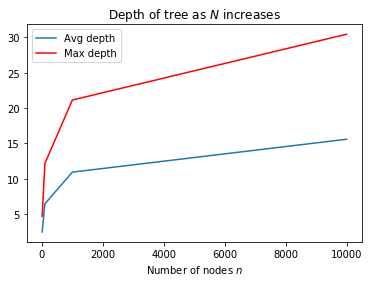

In [69]:
import matplotlib.pyplot as plt
import random

def build_tree(nodes):
    bst = None
    for node in nodes:
        if not bst:
            bst = node
        else:
            bst.insert(node)
    return bst

n_nodes = []
avg_d = []
max_d = []
trials = 50
for j in range(1,5):
    sum_avg = 0
    sum_max = 0
    for trial in range(trials):    
        nodes = [Node(i) for i in range(10**j)]
        random.shuffle(nodes)
        bst = build_tree(nodes)
        sum_avg+= avg_depth(nodes[0])
        sum_max+= max_depth(nodes[0])
    avg_d.append(sum_avg/trials)
    max_d.append(sum_max/trials)
    n_nodes.append(10**j)
plt.plot(n_nodes,avg_d)
plt.plot(n_nodes,max_d,color='red')
plt.legend(['Avg depth','Max depth'])
plt.xlabel('Number of nodes $n$')
plt.title('Depth of tree as $N$ increases')
plt.show()
